# 趨勢、位階、型態（２）

## 程式實作：人工方式標註多翻空過程，以瞭解多空之間的各種現象及其特徵

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2008年3月21日到2008年11月27日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day18.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

#### 空頭起跌

In [3]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

In [4]:
### 人工方式標示空頭起跌 ###
start_fall_points_len = len(np.array(df_k_line['Close']))
start_fall_points = np.array([np.nan]*start_fall_points_len)
# 起跌就是最高檔的三個高點：
# 第一個：最高點
idx = date_to_index(df_k_line,'2008-05-19')
start_fall_points[idx] = df_k_line.iloc[idx]['Close']
# 第二個：空頭下跌後反彈再續跌的點位
idx = date_to_index(df_k_line,'2008-06-06')
start_fall_points[idx] = df_k_line.iloc[idx]['Close']
# 設定頸線
neckline_price = df_k_line.loc['2008-04-01']['Close']
neckline_start_date = '2008-03-21'
neckline_end_date = '2008-06-18'
# 第三個：頭部型態或盤整區間跌破的點位
idx = date_to_index(df_k_line,'2008-06-10')
start_fall_points[idx] = neckline_price

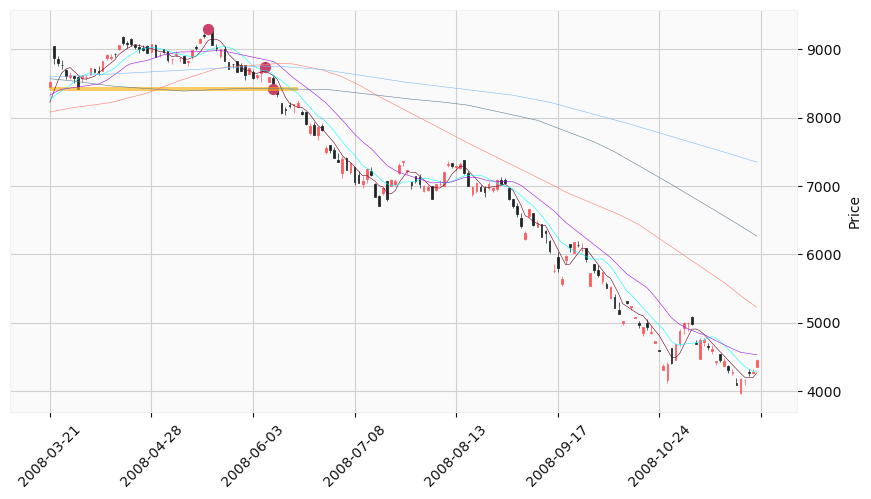

In [5]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定與頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
                     ]

# 設定空頭起跌點與移動平均線
added_plots={
    "START": mpf.make_addplot(start_fall_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.5, colors='xkcd:orange yellow', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

### 空頭反彈
空頭下跌中的上漲就是反彈

In [6]:
range_lines = []
# 範圍一
corner1 = ('2008-07-18',df_k_line.loc['2008-07-23']['Close'])
corner2 = ('2008-07-23',df_k_line.loc['2008-07-23']['Close'])
corner3 = ('2008-07-18',df_k_line.loc['2008-07-18']['Close'])
corner4 = ('2008-07-23',df_k_line.loc['2008-07-18']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍二
corner1 = ('2008-08-05',df_k_line.loc['2008-08-15']['Open'])
corner2 = ('2008-08-15',df_k_line.loc['2008-08-15']['Open'])
corner3 = ('2008-08-05',df_k_line.loc['2008-08-05']['Close'])
corner4 = ('2008-08-15',df_k_line.loc['2008-08-05']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍三
corner1 = ('2008-09-18',df_k_line.loc['2008-09-24']['Close'])
corner2 = ('2008-09-24',df_k_line.loc['2008-09-24']['Close'])
corner3 = ('2008-09-18',df_k_line.loc['2008-09-18']['Open'])
corner4 = ('2008-09-24',df_k_line.loc['2008-09-18']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍四
corner1 = ('2008-10-28',df_k_line.loc['2008-11-05']['Open'])
corner2 = ('2008-11-05',df_k_line.loc['2008-11-05']['Open'])
corner3 = ('2008-10-28',df_k_line.loc['2008-10-28']['Open'])
corner4 = ('2008-11-05',df_k_line.loc['2008-10-28']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

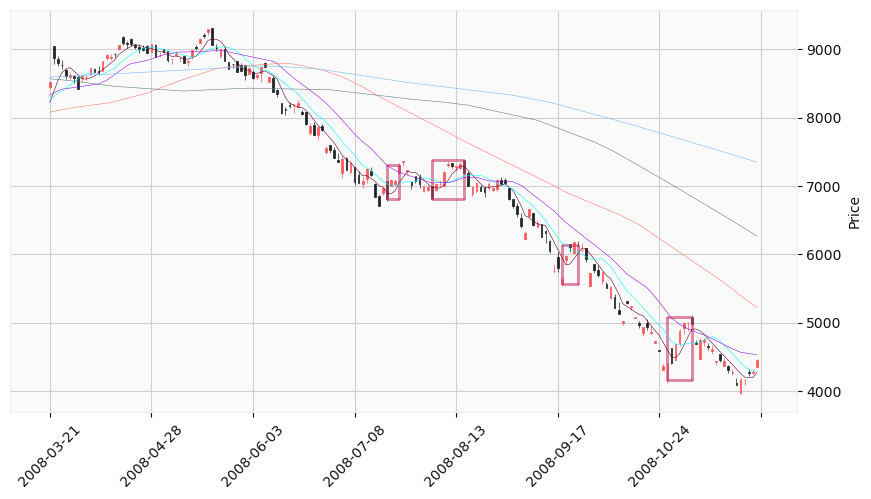

In [7]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定範圍
seq_of_seq_of_points=range_lines

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 空頭續跌

In [8]:
range_lines = []
# 範圍一
corner1 = ('2008-05-20',df_k_line.loc['2008-05-20']['Open'])
corner2 = ('2008-07-16',df_k_line.loc['2008-05-20']['Open'])
corner3 = ('2008-05-20',df_k_line.loc['2008-07-16']['Close'])
corner4 = ('2008-07-16',df_k_line.loc['2008-07-16']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍二
corner1 = ('2008-07-24',df_k_line.loc['2008-07-24']['Close'])
corner2 = ('2008-08-05',df_k_line.loc['2008-07-24']['Close'])
corner3 = ('2008-07-24',df_k_line.loc['2008-08-05']['Close'])
corner4 = ('2008-08-05',df_k_line.loc['2008-08-05']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍三
corner1 = ('2008-08-14',df_k_line.loc['2008-08-15']['Open'])
corner2 = ('2008-08-20',df_k_line.loc['2008-08-15']['Open'])
corner3 = ('2008-08-14',df_k_line.loc['2008-08-19']['Open'])
corner4 = ('2008-08-20',df_k_line.loc['2008-08-19']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍四
corner1 = ('2008-08-29',df_k_line.loc['2008-08-29']['Open'])
corner2 = ('2008-09-18',df_k_line.loc['2008-08-29']['Open'])
corner3 = ('2008-08-29',df_k_line.loc['2008-09-18']['Open'])
corner4 = ('2008-09-18',df_k_line.loc['2008-09-18']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍五
corner1 = ('2008-09-25',df_k_line.loc['2008-09-25']['Open'])
corner2 = ('2008-10-28',df_k_line.loc['2008-09-25']['Open'])
corner3 = ('2008-09-25',df_k_line.loc['2008-10-28']['Open'])
corner4 = ('2008-10-28',df_k_line.loc['2008-10-28']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍六
corner1 = ('2008-11-03',df_k_line.loc['2008-11-03']['Close'])
corner2 = ('2008-11-21',df_k_line.loc['2008-11-03']['Close'])
corner3 = ('2008-11-03',df_k_line.loc['2008-11-21']['Open'])
corner4 = ('2008-11-21',df_k_line.loc['2008-11-21']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

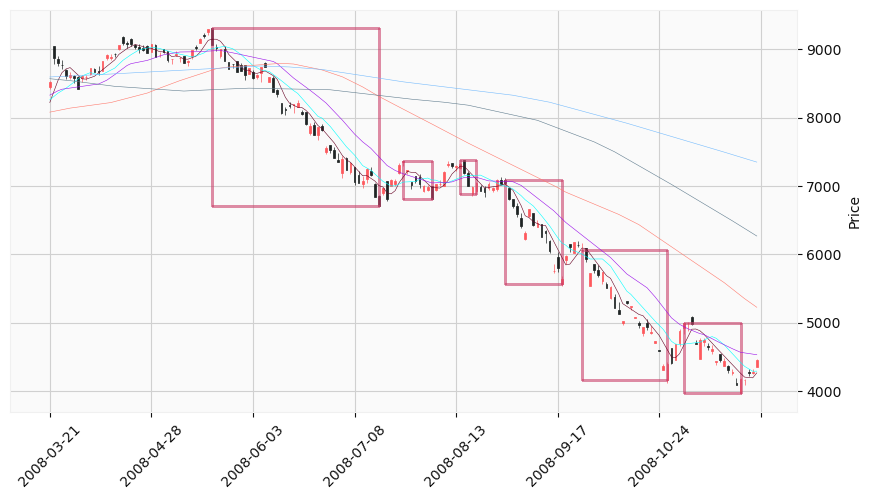

In [9]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定範圍
seq_of_seq_of_points=range_lines

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 空頭盤整

In [10]:
range_lines = []
# 範圍一
corner1 = ('2008-07-07',df_k_line.loc['2008-08-15']['Open'])
corner2 = ('2008-09-02',df_k_line.loc['2008-08-15']['Open'])
corner3 = ('2008-07-07',df_k_line.loc['2008-07-16']['Close'])
corner4 = ('2008-09-02',df_k_line.loc['2008-07-16']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍二
corner1 = ('2008-09-15',df_k_line.loc['2008-09-23']['Close'])
corner2 = ('2008-10-03',df_k_line.loc['2008-09-23']['Close'])
corner3 = ('2008-09-15',df_k_line.loc['2008-09-30']['Open'])
corner4 = ('2008-10-03',df_k_line.loc['2008-09-30']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 範圍三
corner1 = ('2008-10-20',df_k_line.loc['2008-10-21']['Open'])
corner2 = ('2008-11-17',df_k_line.loc['2008-10-21']['Open'])
corner3 = ('2008-10-20',df_k_line.loc['2008-10-29']['Close'])
corner4 = ('2008-11-17',df_k_line.loc['2008-10-29']['Close'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

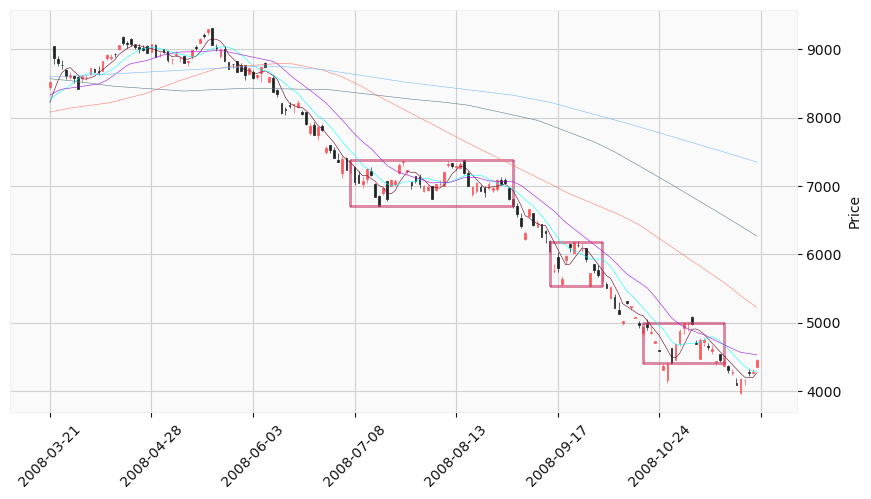

In [11]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定範圍
seq_of_seq_of_points=range_lines

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 空頭止跌/落底 

In [12]:
### 人工方式標示空頭落底 ###
stop_fall_points_len = len(np.array(df_k_line['Close']))
stop_fall_points = np.array([np.nan]*stop_fall_points_len)

# 最低點
idx = date_to_index(df_k_line,'2008-11-21')
stop_fall_points[idx] = df_k_line.iloc[idx]['Open']

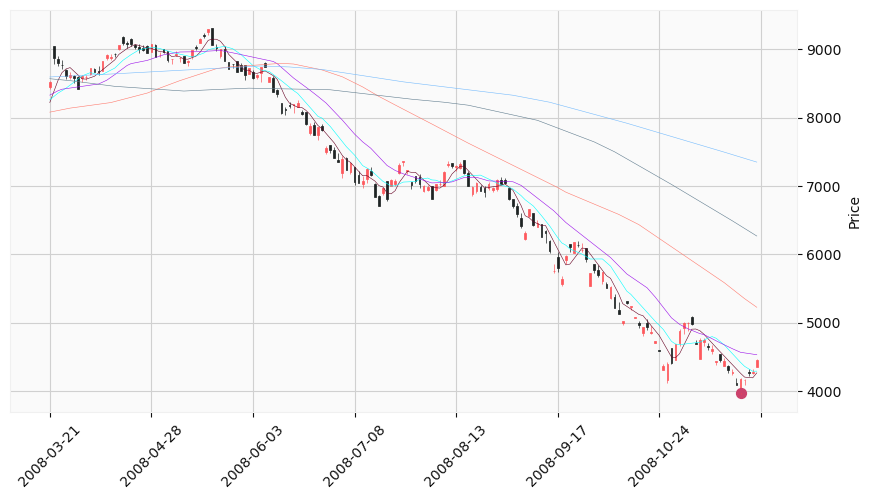

In [13]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定空頭落底點與移動平均線
added_plots={
    "STOP": mpf.make_addplot(stop_fall_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 空頭打底/築底 與 空頭成底

In [14]:
##### 使用2019年7月15日到2019年1月30日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day19.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [15]:
range_lines = []
# 底部範圍
corner1 = ('2019-08-02',df_k_line.loc['2019-08-02']['Close'])
corner2 = ('2019-09-04',df_k_line.loc['2019-08-02']['Close'])
corner3 = ('2019-08-02',df_k_line.loc['2019-08-06']['Open'])
corner4 = ('2019-09-04',df_k_line.loc['2019-08-06']['Open'])
range_lines.append([corner1,corner2])
range_lines.append([corner1,corner3])
range_lines.append([corner3,corner4])
range_lines.append([corner4,corner2])

# 突破點
breakthrough_points_len = len(np.array(df_k_line['Close']))
breakthrough_points = np.array([np.nan]*breakthrough_points_len)
breakthrough_points[date_to_index(df_k_line,'2019-08-30')] = df_k_line.loc['2019-08-02']['Close']

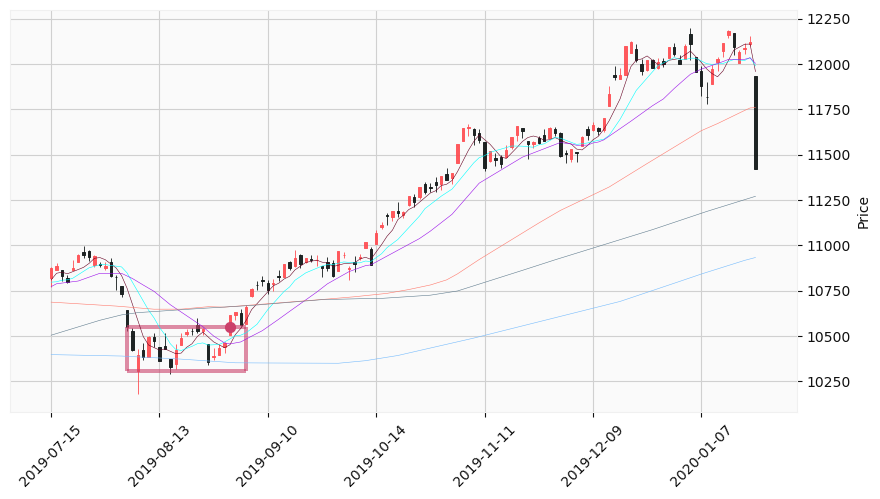

In [16]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定與頸線
seq_of_seq_of_points=range_lines

# 設定突破點與移動平均線
added_plots={
    "BREAKTHROUGH": mpf.make_addplot(breakthrough_points,type='scatter',marker='o',markersize=50,color='xkcd:dark pink'),
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.5, colors='xkcd:dark pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)